<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

## 0. python imports & setup

for learning purposes, libraries will be imported inside its corresponding usage section...

## 1. data loading

In [7]:
import random
import pandas as pd
import numpy as np

In [8]:
def rolling_a_dice(x):
    dice_options = [1,2,3,4,5,6]
    dice_results = random.choices(dice_options, k=x)
    return pd.DataFrame(dice_results, columns=['results'])

dice_df = rolling_a_dice(10)

In [9]:
dice_df

,results
0,1
1,6
2,4
3,4
4,2
5,1
6,3
7,5
8,5
9,6


<AxesSubplot:>

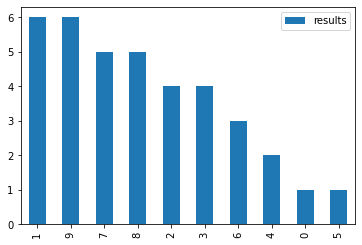

In [10]:
dice_df.sort_values(by='results', ascending=False).plot.bar()

* diamonds: labeled data we can use for training and testing
* diamonds_predict: diamonds to predict its price and upload result to Kaggle

In [11]:
diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds_predict = pd.read_csv('../data/diamonds_predict.csv')

In [12]:
diamonds.head().T

,0,1,2,3,4
carat,1.21,0.32,0.71,0.41,1.02
cut,Premium,Very Good,Fair,Good,Ideal
color,J,H,G,D,G
clarity,VS2,VS2,VS1,SI1,SI1
depth,62.4,63.0,65.5,63.8,60.5
table,58.0,57.0,55.0,56.0,59.0
price,4268,505,2686,738,4882
x,6.83,4.35,5.62,4.68,6.55
y,6.79,4.38,5.53,4.72,6.51
z,4.25,2.75,3.65,3.0,3.95


as you can see, there are both categorical and numerical columns...

## 2. eda

this section is up to you! this guided lesson is about a machine learning pipeline...

## 3. ml preprocessing

in this section I will teach how to use scikit-learn's Pipiline and ColumnTransformer, one of the best practices for composing preprocessing and modeling in a single and elegand class... pay attention as it is hard to understand...

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

let's identify numerical and categorical features...

In [14]:
NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z']
CAT_FEATS = ['cut', 'color', 'clarity']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'

let's define a preprocessing transformer for numerical columns...

In [15]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

let's define a preprocessing transformer for categorical columns...

In [16]:
categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

let's join these transformers using a `ColumnTransformer`:

In [17]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                ('cat', categorical_transformer, CAT_FEATS)])

inspecting the full preprocessor:

In [18]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cut', 'color', 'clarity'])])

In [23]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


how does this preprocessing looks like?

at least in this case, it is at the cost of interpretability of transformed DataFrame...

In [22]:
pd.DataFrame(data=preprocessor.fit_transform(diamonds)).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.004557,0.871099,-0.199745,-1.226738,-1.179816,-1.129259,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.184434,2.617265,-1.095198,-0.097286,-0.176882,0.161891,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.815298,1.429872,-0.647472,-0.933258,-0.883296,-0.770607,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.467458,-0.875068,0.695707,0.729794,0.677793,0.592274,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 4. train a simple model

first, lets train a simple model using holdout, train - test split...

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
diamonds_train, diamonds_test = train_test_split(diamonds)

In [13]:
print(diamonds_train.shape)
print(diamonds_test.shape)

(30341, 10)
(10114, 10)


let's choose a model from scikit-learn cheatsheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [14]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor())])

In [15]:
model.fit(diamonds_train[FEATS], diamonds_train[TARGET]);

## 5. check model performance on test and train data

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
y_test = model.predict(diamonds_test[FEATS])
y_train = model.predict(diamonds_train[FEATS])

In [18]:
print(f"test error: {mean_squared_error(y_pred=y_test, y_true=diamonds_test[TARGET], squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=diamonds_train[TARGET], squared=False)}")

test error: 566.8104292649324
train error: 209.39746802936426


## 6. check model performance using cross validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
scores = cross_val_score(model, 
                         diamonds[FEATS], 
                         diamonds[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=5, n_jobs=-1)

In [21]:
import numpy as np
np.mean(-scores)

561.2383794445702

## 7. optimize model using grid search

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'regressor__n_estimators': [16, 32, 64, 128, 256, 512],
    'regressor__max_depth': [2, 4, 8, 16],
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv=5, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=32)

grid_search.fit(diamonds[FEATS], diamonds[TARGET])

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START preprocessor__num__imputer__strategy=median, regressor__max_depth=4, regressor__n_estimators=64
[CV 1/5; 1/32] END preprocessor__num__imputer__strategy=median, regressor__max_depth=4, regressor__n_estimators=64;, score=-1253.725 total time=   2.8s
[CV 3/5; 3/32] START preprocessor__num__imputer__strategy=mean, regressor__max_depth=2, regressor__n_estimators=64
[CV 3/5; 3/32] END preprocessor__num__imputer__strategy=mean, regressor__max_depth=2, regressor__n_estimators=64;, score=-1642.757 total time=   1.8s
[CV 1/5; 4/32] START preprocessor__num__imputer__strategy=mean, regressor__max_depth=8, regressor__n_estimators=64
[CV 1/5; 4/32] END preprocessor__num__imputer__strategy=mean, regressor__max_depth=8, regressor__n_estimators=64;, score=-822.140 total time=   6.8s
[CV 4/5; 4/32] START preprocessor__num__imputer__strategy=mean, regressor__max_depth=8, regressor__n_estimators=64
[CV 4/5; 4/32] END prepro

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

## 8. prepare submission

In [26]:
y_pred = grid_search.predict(diamonds_predict[FEATS])

In [27]:
submission_df = pd.DataFrame({'id': diamonds_predict['id'], 'price': y_pred})

In [28]:
submission_df.head()

,id,price
0,0,2951.143456
1,1,5383.738714
2,2,9318.955355
3,3,4146.608685
4,4,1703.914526


In [29]:
submission_df.describe()

,id,price
count,13485.000000,13485.000000
mean,6742.000000,3953.452654
std,3892.928525,3948.293788
min,0.000000,371.934951
25%,3371.000000,946.225611
50%,6742.000000,2464.845363
75%,10113.000000,5323.039914
max,13484.000000,18084.444910


In [30]:
submission_df.price.clip(0, 20000, inplace=True)

In [31]:
submission_df.to_csv('diamonds_rf.csv', index=False)

## 9. let's try more models...

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>